In [146]:
library(dplyr)
library(stringr)
library(tidyverse)
library(ggplot2)

In [147]:
source('../gene_table_and_other_scripts/theme_Publication.R')

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont().

Georgia already regist

In [148]:
Ath_TF_list <- read.csv('./scan_motif/Ath_TF_list.txt', sep = '\t')

In [171]:
# List all directories
directories <- list.dirs(path = '/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle', full.names = TRUE, recursive = FALSE)

# directories <- list.dirs(path = '/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_WGCNA_by_module_vs_non_variable_control', full.names = TRUE, recursive = FALSE)

# Initialize an empty data frame to store combined results
combined_results <- data.frame()

# Loop through directories and read knownResults.txt files
for (dir in directories) {
  file_path <- file.path(dir, "ame.tsv")
  
  # Check if the file exists
  if (file.exists(file_path)) {
    print(paste("Reading", file_path))

    # Attempt to read the file
    tryCatch({
      results <- read.table(file_path, header = TRUE, sep = "\t", stringsAsFactors = FALSE)
      
      # Check if the file contains data rows
      if (nrow(results) > 0) {
        # Add a column for directory/source
        results$Source <- basename(dir)
        
        # Combine with the main data frame
        combined_results <- rbind(combined_results, results)
      } else {
        print(paste("File contains header but no data rows:", file_path))
      }
    }, error = function(e) {
      print(paste("Error reading file:", file_path, "Error:", e$message))
    })
  } else {
    print(paste("File does not exist:", file_path))
  }
}

# Inspect the combined data frame
combined_results %>% sample_n(5)


[1] "Reading /media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle/MEblue/ame.tsv"
[1] "Reading /media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle/MEcyan/ame.tsv"
[1] "Reading /media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle/MEdarkgreen/ame.tsv"
[1] "Reading /media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle/MEdarkred/ame.tsv"
[1] "Reading /media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle/MEdarkturquoise/ame.tsv"
[1] "Reading /media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle/MEgreenyellow/ame.tsv"
[1] "Reading /media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle/MEmidnightblue/ame.tsv"
[1] "Reading /media/HDD2/donghui/bulk_ATAC_DM1_DM2d/WGCNA_ATAC_integration/ame_results_with_shuffle/MEpurple/ame.tsv"
[1] "Reading /media/HDD2/donghui/bulk_

rank,motif_DB,motif_ID,motif_alt_ID,consensus,p.value,adj_p.value,E.value,tests,FASTA_max,pos,neg,PWM_min,TP,X.TP,FP,X.FP,Source
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>
31,/data/scan_motif/Ath_TF_binding_motifs_plantTFDB.meme,AT1G29160,MP00166,RWAAAAADDAAAAAGTRAAAA,5.34e-67,1.09e-63,6.76e-61,2044,2859,2859,2859,1.78,1033,36.13,464,16.23,MEcyan
188,/data/scan_motif/Ath_TF_binding_motifs_plantTFDB.meme,AT1G77200,MP00245,YCACCGACAMWDNH,1.34e-21,7.55e-19,4.68e-16,563,3219,3219,3219,2.52,284,8.82,105,3.26,MEblue
51,/data/scan_motif/Ath_TF_binding_motifs_plantTFDB.meme,AT4G21030,MP00445,AAADNAAAAAGGYAAAAAA,1.11e-07,3.01e-05,1.86e-02,270,132,132,1056,1.96,44,33.33,146,13.83,MEdarkred
191,/data/scan_motif/Ath_TF_binding_motifs_plantTFDB.meme,AT5G04410,MP00059,NNRCAMGCCANN,4.31e-05,1.53e-02,9.48e+00,358,129,129,1032,1.26,50,38.76,227,22.00,MEdarkgreen
97,/data/scan_motif/Ath_TF_binding_motifs_plantTFDB.meme,AT1G46768,MP00188,DTGTCGGTGGHGR,1.53e-40,1.01e-37,6.26e-35,661,2859,2859,2859,1.60,437,15.29,140,4.90,MEcyan


In [172]:
combined_results <- combined_results %>% left_join(Ath_TF_list %>% select(Gene_ID, Family), by = c('motif_ID' = 'Gene_ID')) %>% mutate(motif_DB = motif_DB %>% str_remove_all('/data/scan_motif/Ath_TF_binding_motifs_')) %>% 
    distinct() %>% dplyr::rename(module = Source)

Warning message in left_join(., Ath_TF_list %>% select(Gene_ID, Family), by = c(motif_ID = "Gene_ID")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 5 of `x` matches multiple rows in `y`.
ℹ Row 1585 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [173]:
combined_results %>% arrange(`p.value`)

rank,motif_DB,motif_ID,motif_alt_ID,consensus,p.value,adj_p.value,E.value,tests,FASTA_max,pos,neg,PWM_min,TP,X.TP,FP,X.FP,module,Family
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>
1,plantTFDB.meme,AT2G45660,MP00076,TTTYTYTTTYTYTYTYTTTYT,5.24e-257,1.55e-253,9.59e-251,2958,3219,3219,3219,8.79,1405,43.65,249,7.74,MEblue,MIKC_MADS
2,plantTFDB.meme,AT2G01570,MP00611,VAGAAAAAGACAAAARNARR,1.24e-255,4.19e-252,2.59e-249,3375,3219,3219,3219,3.18,1746,54.24,473,14.69,MEblue,GRAS
3,plantTFDB.meme,AT5G17430,MP00610,AADAAARARAAAAARAGARA,3.66e-237,9.60e-234,5.95e-231,2627,3219,3219,3219,3.50,1518,47.16,353,10.97,MEblue,AP2
1,plantTFDB.meme,AT2G45660,MP00076,TTTYTYTTTYTYTYTYTTTYT,2.06e-208,5.05e-205,3.13e-202,2456,2859,2859,2859,4.93,1293,45.23,283,9.90,MEcyan,MIKC_MADS
2,plantTFDB.meme,AT2G01570,MP00611,VAGAAAAAGACAAAARNARR,1.09e-205,3.08e-202,1.90e-199,2825,2859,2859,2859,2.15,1597,55.86,502,17.56,MEcyan,GRAS
3,plantTFDB.meme,AT5G17430,MP00610,AADAAARARAAAAARAGARA,2.31e-201,5.05e-198,3.13e-195,2187,2859,2859,2859,2.02,1423,49.77,383,13.40,MEcyan,AP2
4,plantTFDB.meme,AT4G38000,MP00478,HTTTTTWTTTTTTTTTTTTWWCTTTTTH,1.49e-164,3.80e-161,2.35e-158,2545,3219,3219,3219,1.11,1796,55.79,737,22.90,MEblue,Dof
5,plantTFDB.meme,AT1G72050,MP00229,CYTCCTCCTCCTCCTCCTC,1.40e-161,2.26e-158,1.40e-155,1616,3219,3219,3219,1.25,1261,39.17,343,10.66,MEblue,C2H2
6,plantTFDB.meme,AT1G49480,MP00192,RAMAAAAAAAAAAAA,1.20e-160,2.56e-157,1.58e-154,2130,3219,3219,3219,5.71,1024,31.81,203,6.31,MEblue,B3


In [174]:
# Function to calculate combined p-value using Simes' method
calculate_combined_p_simes <- function(p_values) {
  sorted_p_values = sort(p_values)
  n = length(p_values)
  simes_p_values = (n:1) * sorted_p_values / 1:n
  combined_p_value = min(simes_p_values)
  return(combined_p_value)
}

# Apply the Simes' method
combined_p_values_simes <- combined_results %>%
  group_by(module, Family) %>%
  summarise(
    Combined_P_Value = calculate_combined_p_simes(adj_p.value)
  )

# View the results
combined_p_values_simes <- combined_p_values_simes %>%  as.data.frame() %>% arrange(Combined_P_Value) 



`summarise()` has grouped output by 'module'. You can override using the
`.groups` argument.


In [175]:
combined_p_values_simes <- combined_p_values_simes %>% mutate(`-Log10(P.Value)` = -log10(Combined_P_Value))

In [176]:
TFDB_family <- combined_p_values_simes %>% pull(Family) %>% unique()
TFDB_family

[1] "MIKC_MADS"   "GRAS"        "AP2"         "Dof"         "C2H2"       
 [6] "B3"          "ERF"         "BBR-BPC"     "LBD"         "GATA"       
[11] "bHLH"        "Trihelix"    "bZIP"        "MYB"         "MYB_related"
[16] "BES1"        "WRKY"        "NAC"         "C3H"         "FAR1"       
[21] "CAMTA"       "Nin-like"    "HD-ZIP"      "M-type_MADS" "TCP"        
[26] "RAV"         "G2-like"     "ARF"         "GeBP"        "ARR-B"      
[31] "HSF"         "SBP"         "NF-YB"       "ZF-HD"       "CPP"

In [177]:
list_of_families <- c("bHLH", "bZIP", "BES1", "TCP", "ARF", "C2H2", "B3", "GRF", "NFY", "MYB-r", "ERF", "CAMTA", "WRKY", "MYB", "RWPRK", "NAC", "DREB", "Homebox")

In [178]:
setdiff( list_of_families, TFDB_family)

[1] "GRF"     "NFY"     "MYB-r"   "RWPRK"   "DREB"    "Homebox"

In [179]:
combined_p_values_simes %>% filter

module,Family,Combined_P_Value,-Log10(P.Value)
<chr>,<chr>,<dbl>,<dbl>
MEblue,MIKC_MADS,2.1700e-252,251.66354
MEblue,GRAS,4.1900e-252,251.37779
MEblue,AP2,9.6000e-234,233.01773
MEcyan,MIKC_MADS,7.0700e-204,203.15058
MEcyan,GRAS,3.0800e-202,201.51145
MEcyan,AP2,5.0500e-198,197.29671
MEblue,Dof,6.4600e-160,159.18977
MEblue,C2H2,4.2940e-157,156.36714
MEblue,B3,1.0240e-156,155.98970


In [180]:
filtered_data <- combined_p_values_simes %>%
  group_by(Family) %>%
  filter(min(Combined_P_Value) <= 0.001) %>%
  ungroup()
filtered_data 

module,Family,Combined_P_Value,-Log10(P.Value)
<chr>,<chr>,<dbl>,<dbl>
MEblue,MIKC_MADS,2.1700e-252,251.66354
MEblue,GRAS,4.1900e-252,251.37779
MEblue,AP2,9.6000e-234,233.01773
MEcyan,MIKC_MADS,7.0700e-204,203.15058
MEcyan,GRAS,3.0800e-202,201.51145
MEcyan,AP2,5.0500e-198,197.29671
MEblue,Dof,6.4600e-160,159.18977
MEblue,C2H2,4.2940e-157,156.36714
MEblue,B3,1.0240e-156,155.98970


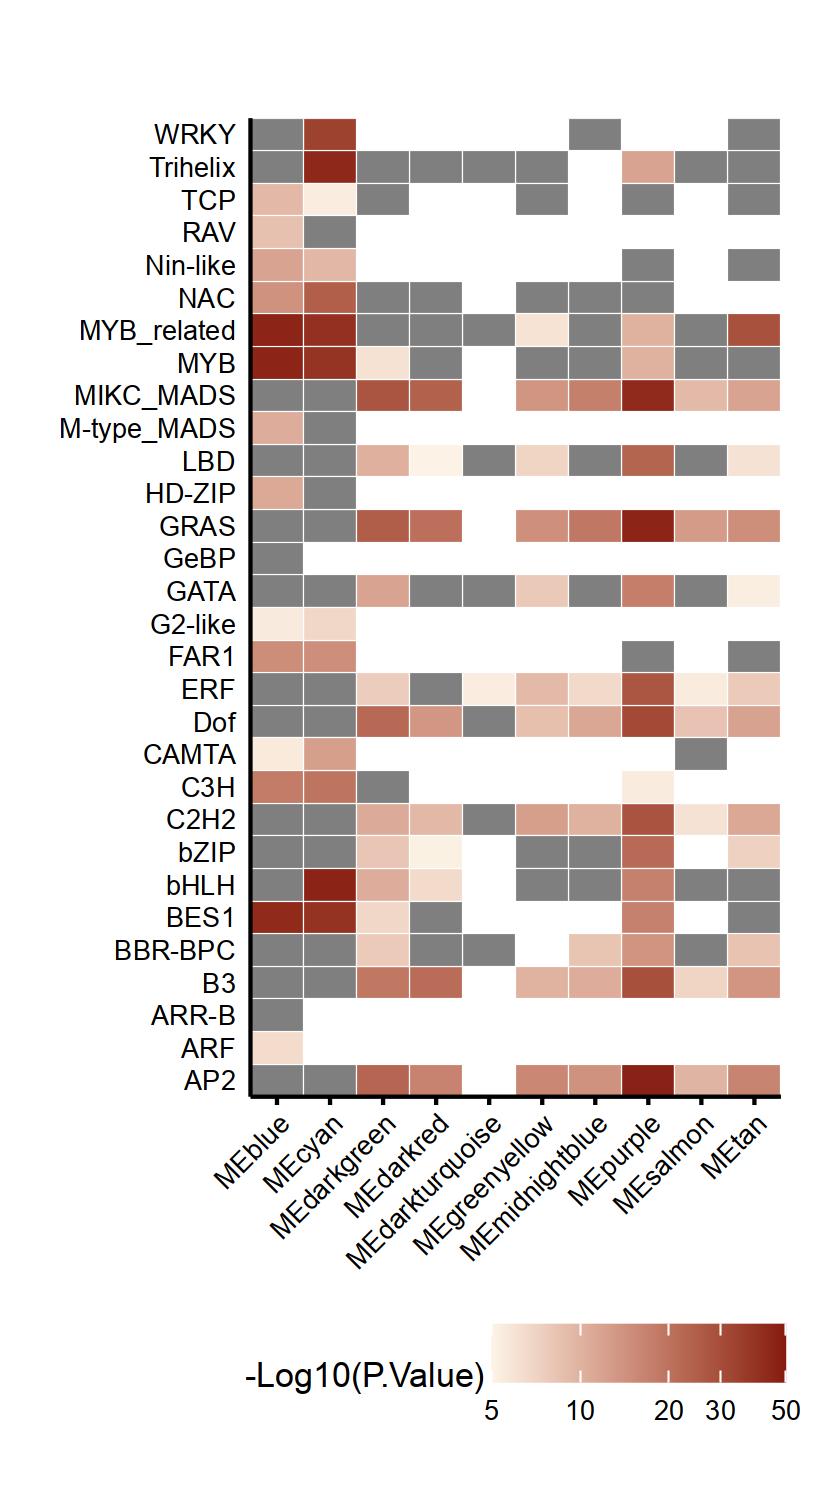

In [203]:
width_ <- 2.8
height_ <- 5
options(repr.plot.width= width_ , repr.plot.height= height_, repr.plot.res = 300)

plot_AME_WGCNA_enrichment <- ggplot(filtered_data, aes(y = Family, x = module, fill = `-Log10(P.Value)`)) + 
geom_tile(colour = "white") + 
scale_fill_gradient(low = "#FDF5E8", high = "#861910", trans = 'log10', limits = c(5, 50)) +
# labs(x=NULL, y=NULL, title=title_text) +
theme_minimal() + theme_Arial_8() +
theme(legend.position = "bottom", 
      axis.title.y = element_blank(), 
      axis.title.x = element_blank(),
      # axis.text.y = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.ticks.y = element_blank()) +
    scale_x_discrete(  expand = c(0, 0)) +
    scale_y_discrete(expand = c(0, 0))
plot_AME_WGCNA_enrichment

ggsave("./WGCNA_ATAC_integration/plots/plot_AME_WGCNA_enrichment.pdf", plot = plot_AME_WGCNA_enrichment, width = width_, height = height_)

In [188]:
-log10(0.00001)

[1] 5

In [1]:
filtered_data

ERROR: Error in eval(expr, envir, enclos): object 'filtered_data' not found


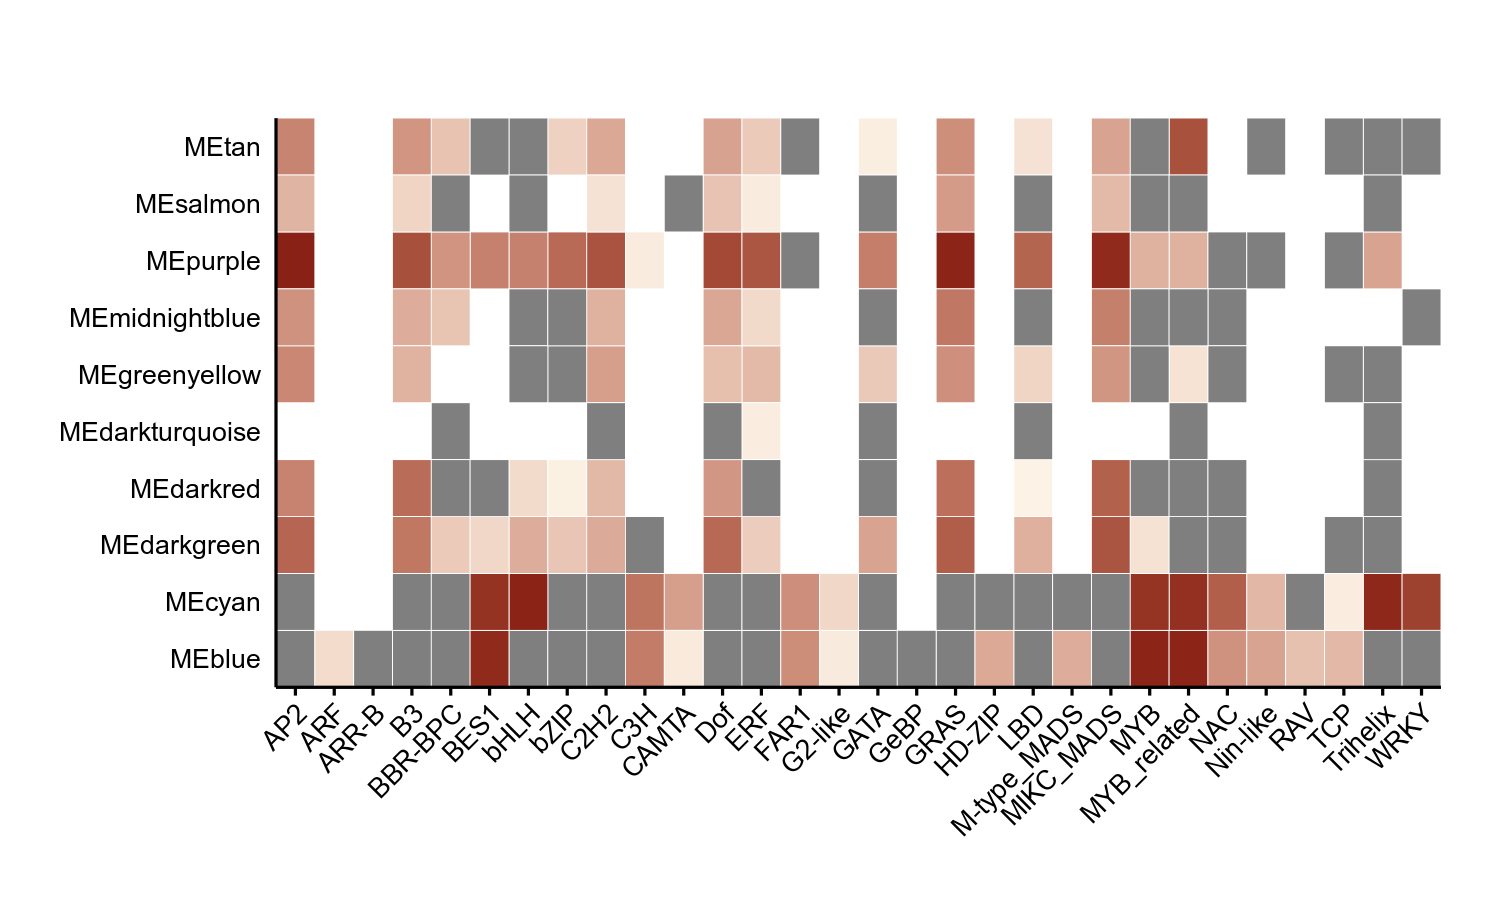

In [189]:
options(repr.plot.width= 5, repr.plot.height= 3, repr.plot.res = 300)

ggplot(filtered_data, aes(x = Family, y = module, fill = `-Log10(P.Value)`)) + 
geom_tile(colour = "white") + 
scale_fill_gradient(low = "#FDF5E8", high = "#861910", trans = 'log10', limits = c(5, 50)) +
# labs(x=NULL, y=NULL, title=title_text) +
theme_minimal() + theme_Arial_8() +
theme(legend.position = "none", 
      axis.title.y = element_blank(), 
      axis.title.x = element_blank(),
      # axis.text.y = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.ticks.y = element_blank()) +
    scale_x_discrete(  expand = c(0, 0)) +
    scale_y_discrete(expand = c(0, 0))